# Assignment n°2 - System Benchmarking

## Research method SS23

### Group n°8: 
    -   Grégoire de Lambertye 
    -   add names

# Problem: Email communication within a large European Research Institution. 
Dataset statistics: https://snap.stanford.edu/data/email-Eu-core.html
Question: How to best structure the email network of this institution so that it is least vulnerable to infection with a virus that propagates through email.
Options: small-world network, scale-free network, random network

## Network creation
According to the data, there are 1005 nodes with an average degree of 25. We will keep this consistent throughout the experiment

### Small netwok

This type of network is characterized by a high degree of clustering and a small average path length between nodes. (E.g., Facebook and Twitter). A virus that spreads quickly through one densely connected group of nodes could have a significant impact on the entire network.

We use Watts-Strogatz method togenerate small-world networks

In [93]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import pandas as pd
import powerlaw

# set seed
rd.seed(123)
N=1005

In [94]:
#find k that leads to desired avg deg
def find_k_for_avg_degree(N, avg_degree):
    k = 2  # Starting value of k
    
    while True:
        network = nx.watts_strogatz_graph(N, k, 0.5)
        degrees = np.array(list(dict(network.degree()).values()))
        
        # Calculate the average degree of the generated network
        calculated_avg_degree = np.mean(degrees)
        
        if abs(calculated_avg_degree - avg_degree) < 2:
            print("avg deg ", calculated_avg_degree)
            break
        
        k += 1
    
    return k


avg_degree = 25  # Desired average degree

k = find_k_for_avg_degree(N, avg_degree)
print("Required value of k:", k)


avg deg  24.0
Required value of k: 24


In [95]:
# Generate Watts-Strogatz model
def generate_watts_strogatz_model(N, K = 24, p = 0.3):
    """"
    input:
        N: Number of nodes
        K: Number of nearest neighbors each node is initially connected to
        p: Probability of rewiring
    output:
        Watts-Strogatz model    
    """
    return(nx.watts_strogatz_graph(N, K, p))

In [96]:
#hairball
ws_model = generate_watts_strogatz_model(N)
plt.figure(figsize=(10, 6))

# Draw the network with adjusted spacing and formatting
pos = nx.spring_layout(ws_model, k=0.4, seed=42)  # Adjust the 'k' value for spacing
nx.draw_networkx(ws_model, pos=pos, with_labels=False, node_size=10, node_color='b', alpha=0.8)
plt.title(f"Watts-Strogatz model,\nN={N}, K={k}, p={0.3}")
plt.show()

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

### Scale-free network

This type of network is characterized by a small number of highly connected nodes and many poorly connected nodes. A virus that targets one or more of the hubs in a scale-free network could spread quickly and have a significant impact on the network.

We use Barabasi-Albert model for scale-free networks

In [ ]:
# Find the parameters for this model so that the average degree is maintained for the number of nodes
def find_m_for_average_degree(N, target_avg_degree):
    # Initialize the value of m
    m = 1
    
    while True:
        # Generate the Barabasi-Albert network with the current value of m
        network = nx.barabasi_albert_graph(N, m)
        
        # Calculate the average degree of the generated network
        avg_degree = sum(dict(network.degree()).values()) / N
        
        # Check if the current average degree is close to the target average degree
        if abs(avg_degree - target_avg_degree) < 1:
            break
        
        # Increment the value of m for the next iteration
        m += 1
    
    return m
    
target_avg_degree = 25  # Desired average degree

m = find_m_for_average_degree(N, target_avg_degree)
print("Required value of m:", m)


Required value of m: 13


In [ ]:
# Generate scale-free network using Barabasi-Albert model
def generate_scale_free_network(N, m = 13):
    """"
    input:
        N: Number of nodes
        m: Number of edges to attach from a new node
    output:
        Scale-free network    
    """ 
    return(nx.barabasi_albert_graph(N, m))

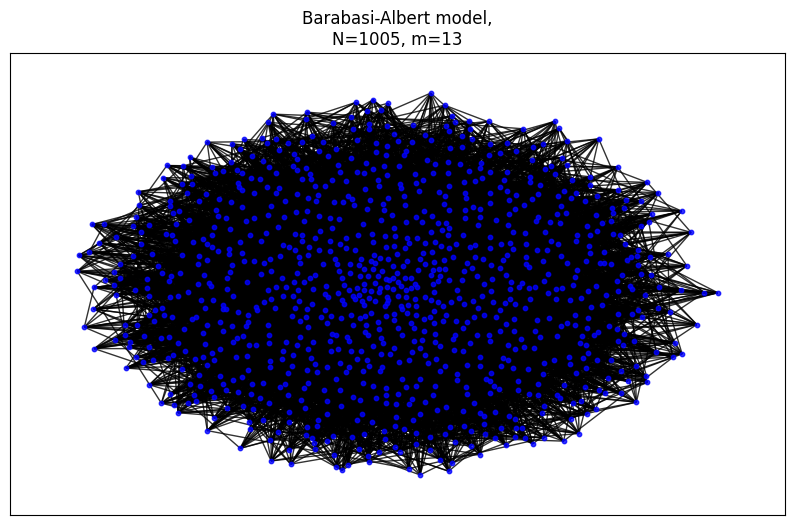

In [ ]:
sf_model = generate_scale_free_network(N)

plt.figure(figsize=(10, 6))

# Draw the network with adjusted spacing and formatting
pos = nx.spring_layout(sf_model, k=0.4, seed=42)  # Adjust the 'k' value for spacing
nx.draw_networkx(sf_model, pos=pos, with_labels=False, node_size=10, node_color='b', alpha=0.8)
plt.title(f"Barabasi-Albert model,\nN={N}, m={m}")
plt.show()

### Random network

This type of network is characterized by nodes that are connected randomly, with no preferential attachment to other nodes. We will use this as a baseline for the comparison.

In [ ]:
#find the necessary p for the desired avg degree
def find_p_for_avg_degree(N, avg_degree):
    p = 25/N   # Starting value of p
    print("start p", p)
    
    while True:
        network = nx.erdos_renyi_graph(N, p)
        degrees = np.array(list(dict(network.degree()).values()))
        
        # Calculate the avg degree of the generated network
        calculated_avg_degree = np.mean(degrees)
        
        if abs(calculated_avg_degree - avg_degree) < 1:
            print ("avg deg", calculated_avg_degree)
            break
        
        p += 0.01  # Increment p for the next iteration
    
    return p

avg_degree = 25  # Desired average degree

p = find_p_for_avg_degree(N, avg_degree)
print("Required value of p:", p)


start p 0.024875621890547265
avg deg 24.975124378109452
Required value of p: 0.024875621890547265


In [ ]:
# Generate random network
def generate_random_network(N):
    p=0.024
    """"
    input:
        N: Number of nodes
        p: Probability of edge creation

    output:
        Random network
    """
    return(nx.gnp_random_graph(N, p))

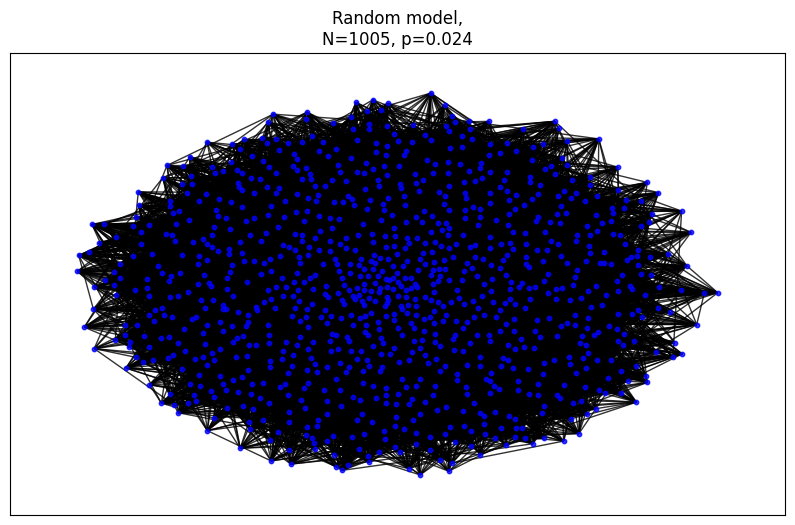

In [ ]:
random_network = generate_random_network(N)

# Plot the graph
plt.figure(figsize=(10, 6))

# Draw the network with adjusted spacing and formatting
pos = nx.spring_layout(sf_model, k=0.4, seed=42)  # Adjust the 'k' value for spacing
nx.draw_networkx(random_network, pos=pos, with_labels=False, node_size=10, node_color='b', alpha=0.8)
plt.title(f"Random model,\nN={N}, p={0.024}")
plt.show()

### Community network network

This type of network is characterized by multiple clusters of nodes that are more densely connected to each other than to nodes in other clusters. (E.g., social networks based on geographic location). A virus that spreads quickly through one or more of the tightly connected clusters could have a significant impact on those communities.

We use Lancichinetti-Fortunato-Radicchi (LFR) model for community networks.

In [ ]:
def generate_lfr_community_network(N, tau1=12.5, tau2=3, mu=0.1, min_degree=20, max_degree=50):
    """"
    input:
        N: Number of nodes
        tau1: Power law exponent for the degree distribution
        tau2: Power law exponent for the community size distribution
        mu: Fraction of intra-community edges incident to each node
        min_degree: Minimum degree of nodes
        max_degree: Maximum degree of nodes
    output:
        LFR community network
    """
    return(nx.LFR_benchmark_graph(N, tau1, tau2, mu, seed=10, min_degree=min_degree, max_degree=max_degree))

lfr_network = generate_lfr_community_network(N)

avg_degree = sum(dict(lfr_network.degree()).values()) / len(lfr_network)

# Print the average degree
print("Average degree:", avg_degree)

Average degree: 24.943283582089553


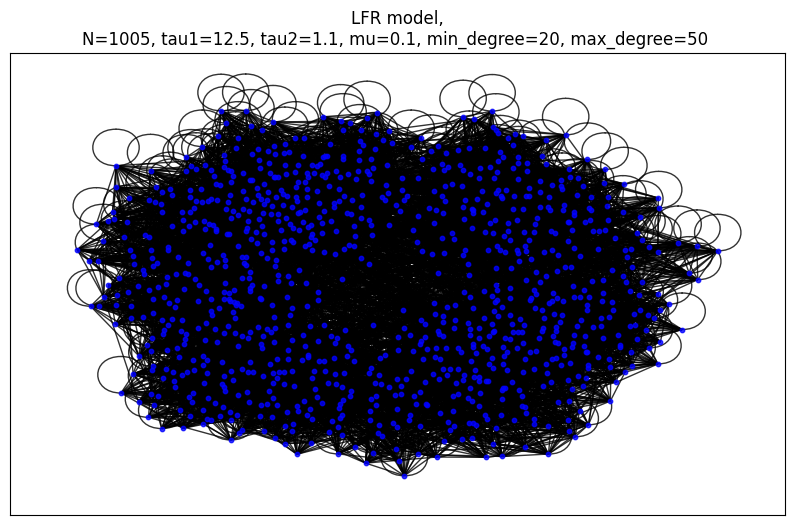

In [ ]:
lfr_network = generate_lfr_community_network(N)

# Plot the graph
plt.figure(figsize=(10, 6))

# Draw the network with adjusted spacing and formatting
pos = nx.spring_layout(lfr_network, k=0.4, seed=42)  # Adjust the 'k' value for spacing
nx.draw_networkx(lfr_network, pos=pos, with_labels=False, node_size=10, node_color='b', alpha=0.8)
plt.title(f"LFR model,\nN={N}, tau1={12.5}, tau2={1.1}, mu={0.1}, min_degree={20}, max_degree={50} ")
plt.show()

In [ ]:
# create a list of all the models generator functions
generator_func = [generate_watts_strogatz_model, generate_scale_free_network, generate_lfr_community_network, generate_random_network]

### Existing mail network 

In [ ]:
def create_network_from_file(file_path):
    G = nx.Graph()

    with open(file_path, 'r') as file:
        for line in file:
            pair = line.strip().split()
            if len(pair) != 2:
                continue
            node1, node2 = pair
            G.add_edge(node1, node2)

    return G

file_path = 'email-Eu-core.txt' 
mail = create_network_from_file(file_path)


## Virus simulation

In [ ]:
def simulate(network, p_infection, ticks_limit):
    
    experiments_track = pd.DataFrame(columns=["clock", "percent_infected"])

    # Set the number of ticks and initialize the clock
    clock = 0

    # Select a random node as the initially infected node
    infected_node = rd.choice(list(network.nodes()))
    infected_nodes = {infected_node}

    time_infection = dict()
    time_infection[infected_node] = clock

    # Start the simulation
    while len(infected_nodes) < len(network.nodes()) and clock < ticks_limit:        
        new_infections = set()
        
        # Iterate over each infected node
        for node in infected_nodes:
            # Infect neighboring nodes with the given probability
            neighbors = network.neighbors(node)
            for neighbor in neighbors:
                if neighbor not in infected_nodes and rd.random() < p_infection:
                    new_infections.add(neighbor)
                    time_infection[neighbor] = clock
        
        # Add newly infected nodes to the infected set
        infected_nodes.update(new_infections)

        # Add the current state to the dataframe
        perc = len(infected_nodes)*100/len(network.nodes())
        experiments_track.loc[clock] = {'clock': clock, 'percent_infected': perc}
    
        clock = clock+1

    # compute correlation between degree, betweenness, closeness and time of infection
    degree_time = pd.Series(dict(network.degree()).values())
    betweenness_time = pd.Series(nx.betweenness_centrality(network))
    closeness_time = pd.Series(nx.closeness_centrality(network))

    degree_time = degree_time.corr(pd.Series(time_infection))
    betweenness_time = betweenness_time.corr(pd.Series(time_infection))
    closeness_time = closeness_time.corr(pd.Series(time_infection))
    # if clock == ticks_limit:
    #     print("Simulation ended because the ticks limit was reached")
    experiments_track = experiments_track.reset_index()
        
    return experiments_track, degree_time, betweenness_time, closeness_time


In [ ]:
def benchmark_network(network, n_simu = 100, p_infection = 0.3, ticks_limit = 150):
    experiments_tracks = pd.DataFrame(columns=["clock", "percent_infected"])
    degree_times = []
    betweenness_times = []
    closeness_times = []
    for i in range(n_simu):
        experiments_track, degree_time, betweenness_time, closeness_time = simulate(network, p_infection, ticks_limit)
        experiments_tracks = pd.concat([experiments_tracks, experiments_track], ignore_index=True)
        degree_times.append(degree_time)
        betweenness_times.append(betweenness_time)
        closeness_times.append(closeness_time)
    experiments_tracks = experiments_tracks.groupby(["clock"]).mean()
    experiments_tracks = experiments_tracks.reset_index()
    
    return experiments_tracks, np.mean(degree_times), np.mean(betweenness_times), np.mean(closeness_times)


In [ ]:
def benchmark_network_type(genrate_function, n_simu=100, n_network=100, p_infection = 0.3, ticks_limit = 150):
    experiments_tracks = pd.DataFrame(columns=["clock", "percent_infected"])
    degree_times = []
    betweenness_times = []
    closeness_times = []
    for i in range(n_network):
        network = genrate_function(N)
        experiments_track, degree_time, betweenness_time, closeness_time = benchmark_network(network, n_simu, p_infection, ticks_limit)
        experiments_tracks = pd.concat([experiments_tracks, experiments_track], ignore_index=True)
        degree_times.append(degree_time)
        betweenness_times.append(betweenness_time)
        closeness_times.append(closeness_time)

    experiments_tracks = experiments_tracks.groupby(["clock"]).mean()
    experiments_tracks = experiments_tracks.reset_index()

    return experiments_tracks, np.mean(degree_times), np.mean(betweenness_times), np.mean(closeness_times)

In [ ]:
#set seed 
rd.seed(123)

experiments_tracks = pd.DataFrame(columns=["clock", "model", "percent_infected"])
correlation = pd.DataFrame(columns=["model", "degree_time", "betweenness_time", "closeness_time"])
correlation.set_index("model", inplace=True)

for generator in generator_func:
    experiments_track, degree_time, betweenness_time, closeness_time = benchmark_network_type(genrate_function=generator, n_simu=5, n_network=10, p_infection = 0.3)
    experiments_track["model"] = generator.__name__
    experiments_tracks = pd.concat([experiments_tracks, experiments_track], ignore_index=True)
    correlation.loc[generator.__name__] = [degree_time, betweenness_time, closeness_time]

experiments_tracks = experiments_tracks.drop(columns=["index"])


In [ ]:
experiments_tracks

,clock,model,percent_infected
0,0,generate_watts_strogatz_model,0.807960
1,1,generate_watts_strogatz_model,5.196020
2,2,generate_watts_strogatz_model,26.364179
3,3,generate_watts_strogatz_model,80.382090
4,4,generate_watts_strogatz_model,99.812935
5,5,generate_watts_strogatz_model,100.000000
6,0,generate_scale_free_network,0.977114
7,1,generate_scale_free_network,11.480597
8,2,generate_scale_free_network,62.041791
9,3,generate_scale_free_network,97.912438


### Plot the models

C:\Users\Daria\AppData\Local\Temp\ipykernel_13208\2107968111.py:13: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  experiments_tracks.reset_index().pivot(index="clock", columns="model", values="percent_infected").plot()


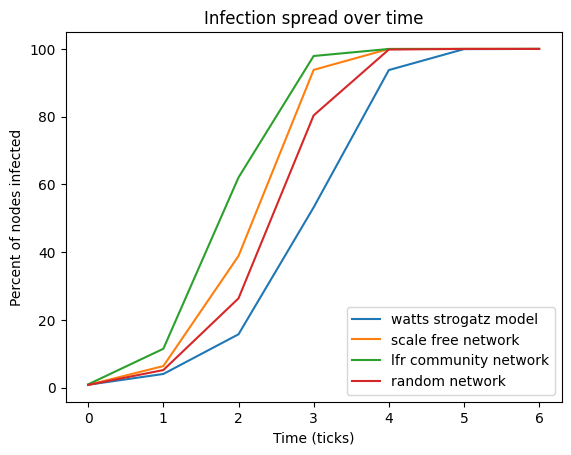

['watts strogatz model',
 'scale free network',
 'lfr community network',
 'random network']

In [ ]:
# add value for all ticks for each model (100% infected)

max_clock = experiments_tracks["clock"].max()
for generator in generator_func:
    for clock in range(max_clock, 0, -1):
        if clock not in experiments_tracks[experiments_tracks["model"] == generator.__name__]["clock"].values:
            new_row = pd.DataFrame([[clock, generator.__name__, 100]], columns=["clock", "model", "percent_infected"])
            experiments_tracks = pd.concat([experiments_tracks, new_row], ignore_index=True)
        else :
            break


experiments_tracks.reset_index().pivot(index="clock", columns="model", values="percent_infected").plot()
plt.legend([name[9:].replace("_", " ") for name in experiments_tracks["model"].unique()])
plt.title("Infection spread over time")
plt.ylabel("Percent of nodes infected")
plt.xlabel("Time (ticks)")

plt.show()
name_list=[name[9:].replace("_", " ") for name in experiments_tracks["model"].unique()]
name_list


### Plot the Eu Mail

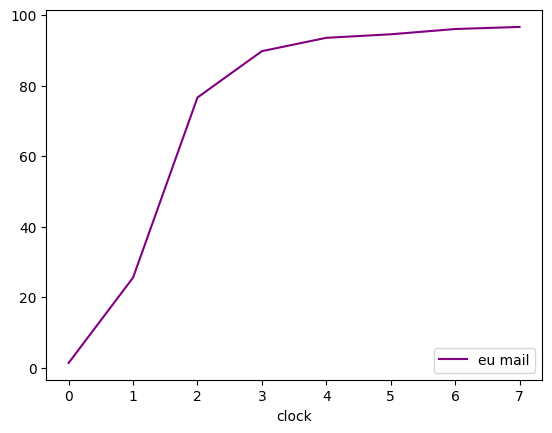

In [ ]:
experiments_track_eu, _, _, _ = simulate(mail, 0.3, 8)
experiments_track_eu.insert(1, 'model', 'eu mail')
experiments_track_eu = experiments_track_eu[['clock', 'model', 'percent_infected']]
experiments_track_eu.reset_index().pivot(index="clock", columns="model", values="percent_infected").plot()
lines = plt.gca().get_lines()
lines[-1].set_color('purple')
legend = plt.legend(loc='lower right')

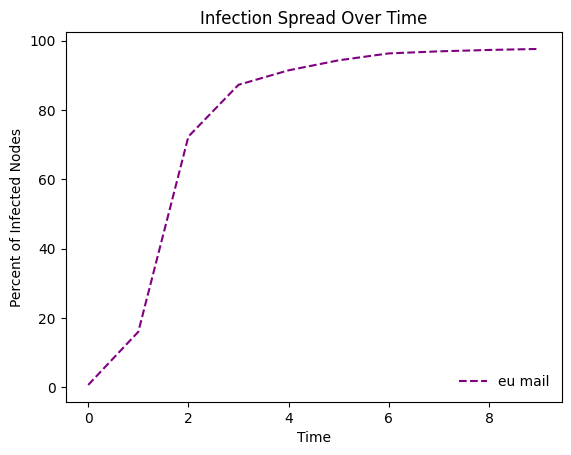

In [ ]:
import matplotlib.pyplot as plt



experiments_track_eu, _, _, _ = simulate(mail, 0.3, 10)
experiments_track_eu.insert(1, 'model', 'eu mail')
experiments_track_eu = experiments_track_eu[['clock', 'model', 'percent_infected']]

# Plotting the data with transparency
plot_data = experiments_track_eu.reset_index().pivot(index="clock", columns="model", values="percent_infected")
lines = plot_data.plot()

# Customize the plot
plt.title("Infection Spread Over Time")
plt.xlabel("Time")
plt.ylabel("Percent of Infected Nodes")

lines = plt.gca().get_lines()
lines[-1].set_linestyle('--')  # Set the line style of the last line to dashed (dotted)
lines[-1].set_color('purple')

# Set transparency for the figure and axes
plt.gcf().set_alpha(0)  # Figure transparency
plt.gca().set_alpha(0)  # Axes transparency

# Set legend properties
legend = plt.legend(loc='lower right')
legend.get_frame().set_alpha(0)  # Legend transparency
legend.get_frame().set_linewidth(0)  # Remove legend border


# Save the plot with transparency
plt.savefig('plot_with_transparency.png', transparent=True)

# Show the plot
plt.show()


### Plot the correlation for the models

In [ ]:
print(correlation)

                                degree_time  betweenness_time  closeness_time
model                                                                        
generate_watts_strogatz_model     -0.082749         -0.083593       -0.086999
generate_scale_free_network       -0.305232         -0.246466       -0.349349
generate_lfr_community_network    -0.094679         -0.090787       -0.122957
generate_random_network           -0.147216         -0.140007       -0.149536


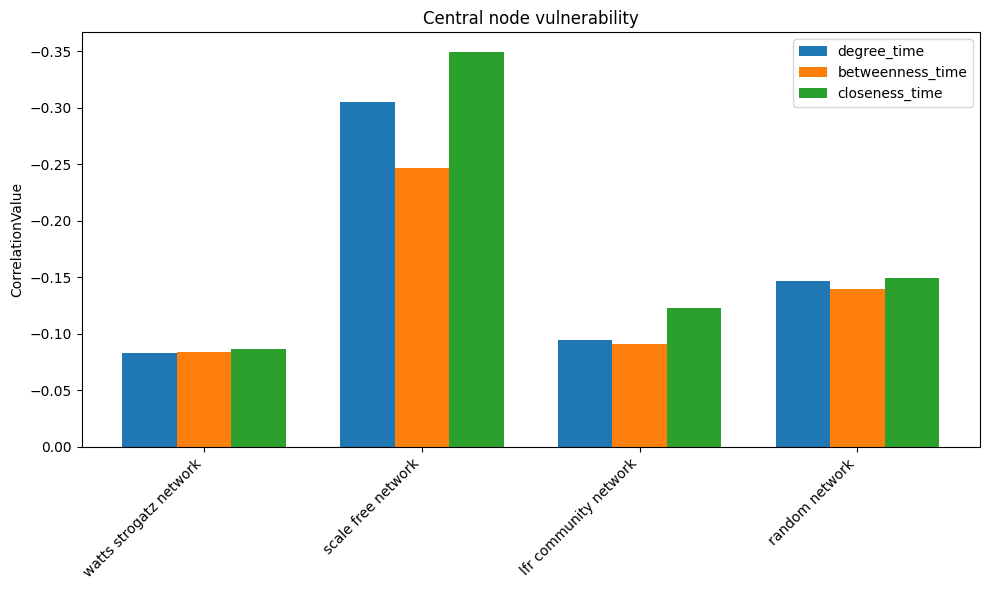

In [ ]:
# corr(time, degree) -> 0 => no correlation 
#corr(time, degree) -> -1  => high centrality -> quick infection


# Define the dataset
degree_time = [-0.082749, -0.305232, -0.094679, -0.147216]
betweenness_time = [-0.083593, -0.246466, -0.090787, -0.140007]
closeness_time = [-0.086999, -0.349349, -0.122957, -0.149536]
model_names = [
    "watts strogatz network",
    "scale free network",
    "lfr community network",
    "random network"
]

# Set the x positions
x = np.arange(len(model_names))

# Set the width of the bars
width = 0.25

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, degree_time, width, label='degree_time')
ax.bar(x, betweenness_time, width, label='betweenness_time')
ax.bar(x + width, closeness_time, width, label='closeness_time')

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')

# Set the y-axis label
ax.set_ylabel('CorrelationValue')

# Set the legend
ax.legend()





# Set the title
plt.title('Central node vulnerability')

# Display the plot
plt.tight_layout()
ax.invert_yaxis() 
plt.show()


### Plot average until total infection

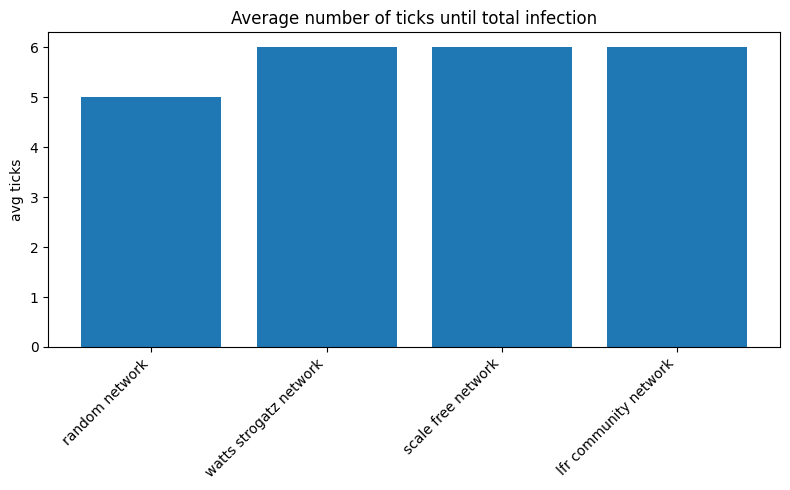

In [131]:
import matplotlib.cm as cm
# Define the data
avg_ticks = [5, 6, 6, 6]
model_names = [
    "random network",
    "watts strogatz network",
    "scale free network",
    "lfr community network"
]

# Set the x positions
x = range(len(model_names))

# Plot the data
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x, avg_ticks)

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')

# Set the y-axis label
ax.set_ylabel('avg ticks')


# Set the color map for all plots
plt.set_cmap(cmap)

# Set the title
plt.title('Average number of ticks until total infection')

# Display the plot
plt.tight_layout()
plt.show()


### Plot the % of nrs infected after 2 and 3 ticks

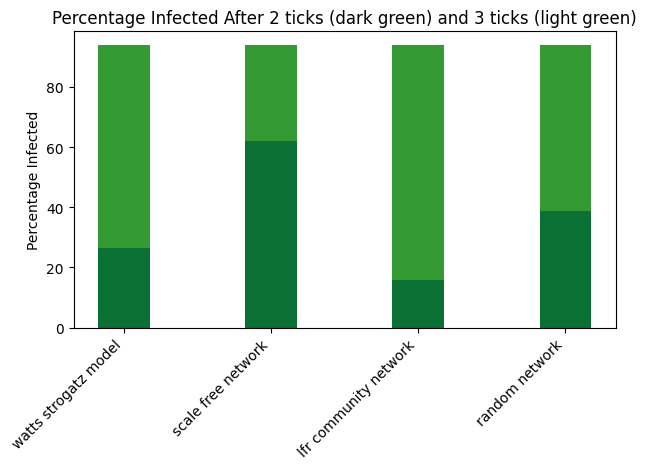

In [132]:
# Extract relevant data
experiments_tracks['model'] = experiments_tracks['model'].str.replace('generate_', '').str.replace('_', ' ')
models = experiments_tracks['model'].unique()

percent_infected_2_ticks = experiments_tracks.loc[experiments_tracks['clock'] == 2, 'percent_infected']

experiments_tracks_3_ticks = experiments_tracks.loc[experiments_tracks['clock'] == 3, 'percent_infected']


# Plotting
fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8

index = range(len(models))

rects1 = ax.bar(index, percent_infected_2_ticks, bar_width, alpha=opacity, color='b', label='2 ticks')
rects2 = ax.bar(index, percent_infected_3_ticks, bar_width, alpha=opacity, color='g', label='3 ticks')

ax.set_ylabel('Percentage Infected')
ax.set_title('Percentage Infected After 2 ticks (dark green) and 3 ticks (light green)')
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Spread visualisation

In [60]:
def simulate_plot(network, p_infection, ticks_limit):
    
    experiments_track = pd.DataFrame(columns=["clock", "percent_infected"])

    # Set the number of ticks and initialize the clock
    clock = 0

    # Select a random node as the initially infected node
    infected_node = rd.choice(list(network.nodes()))
    infected_nodes = {infected_node}

    time_infection = dict()
    time_infection[infected_node] = clock

    # Start the simulation
    while len(infected_nodes) < len(network.nodes()) and clock < ticks_limit:        
        new_infections = set()
        
        # Iterate over each infected node
        for node in infected_nodes:
            # Infect neighboring nodes with the given probability
            neighbors = network.neighbors(node)
            for neighbor in neighbors:
                if neighbor not in infected_nodes and rd.random() < p_infection:
                    new_infections.add(neighbor)
                    time_infection[neighbor] = clock
        
        # Add newly infected nodes to the infected set
        infected_nodes.update(new_infections)

        # Add the current state to the dataframe
        perc = len(infected_nodes)*100/len(network.nodes())
        experiments_track.loc[clock] = {'clock': clock, 'percent_infected': perc}
     
     # Plot the network state
        node_colors = ['r' if node in infected_nodes else 'g' for node in network.nodes()]
        nx.draw(network, with_labels=True, node_color=node_colors)
        plt.title(f"Tick: {clock}")
        plt.show()

        clock = clock+1

    # compute correlation between degree, betweenness, closeness and time of infection
    # corr(time, degree) ->1 => high time high degree
    #corr(time, degree) -> -1  => low time, high degree
    degree_time = pd.Series(dict(network.degree()).values())
    betweenness_time = pd.Series(nx.betweenness_centrality(network))
    closeness_time = pd.Series(nx.closeness_centrality(network))

    degree_time = degree_time.corr(pd.Series(time_infection))
    betweenness_time = betweenness_time.corr(pd.Series(time_infection))
    closeness_time = closeness_time.corr(pd.Series(time_infection))
    # if clock == ticks_limit:
    #     print("Simulation ended because the ticks limit was reached")
    experiments_track = experiments_track.reset_index()
        
    return experiments_track, degree_time, betweenness_time, closeness_time

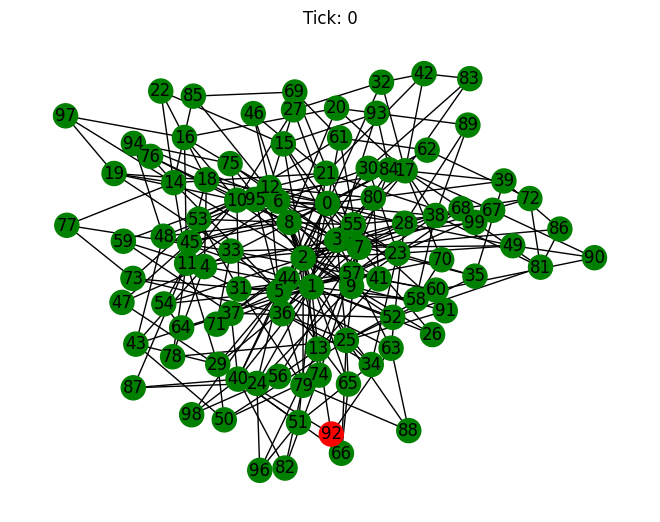

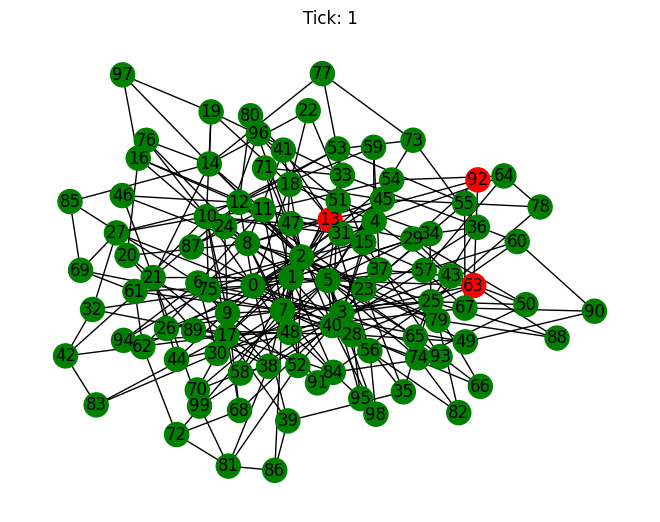

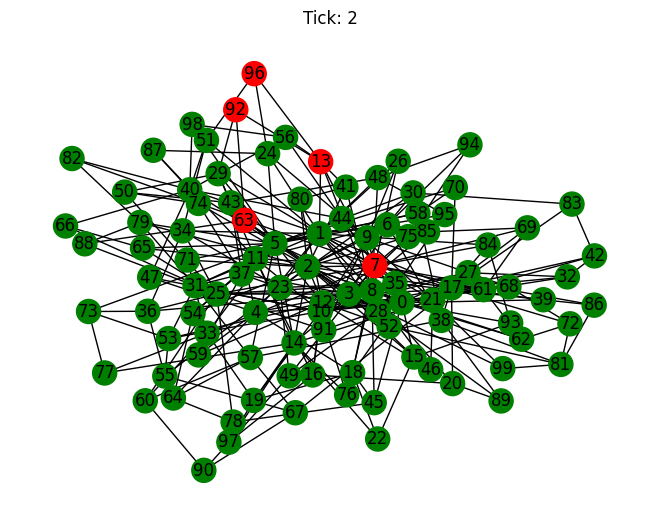

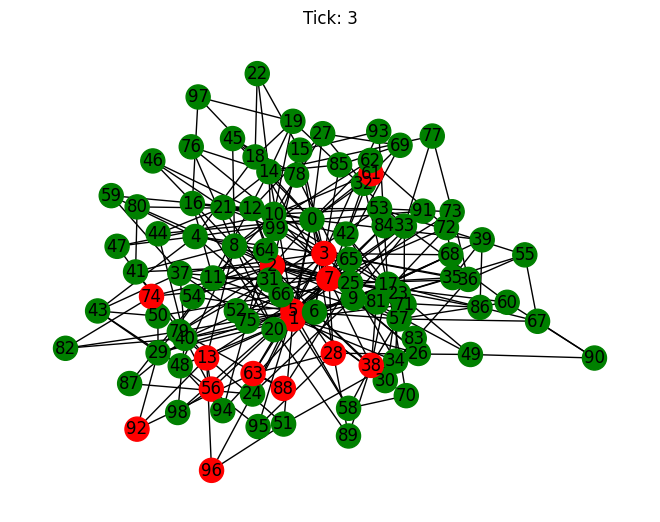

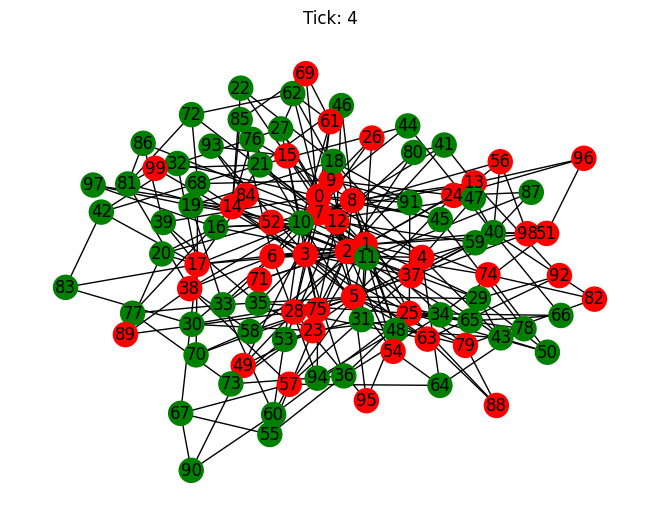

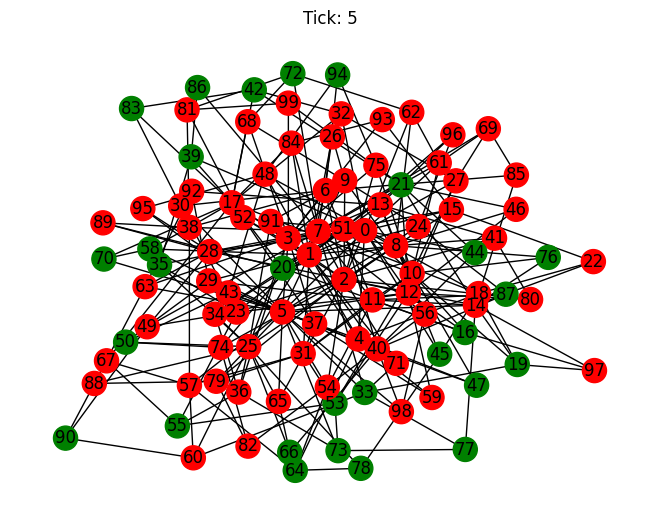

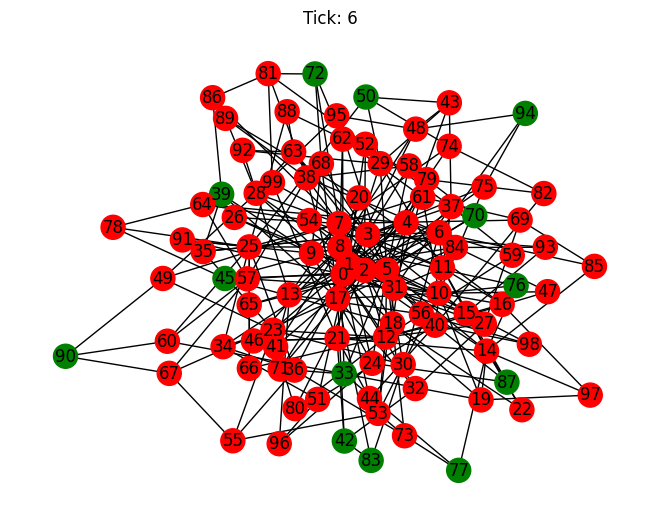

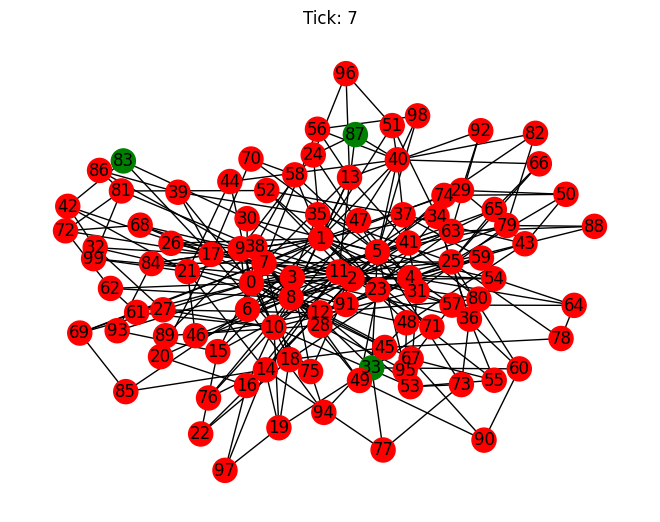

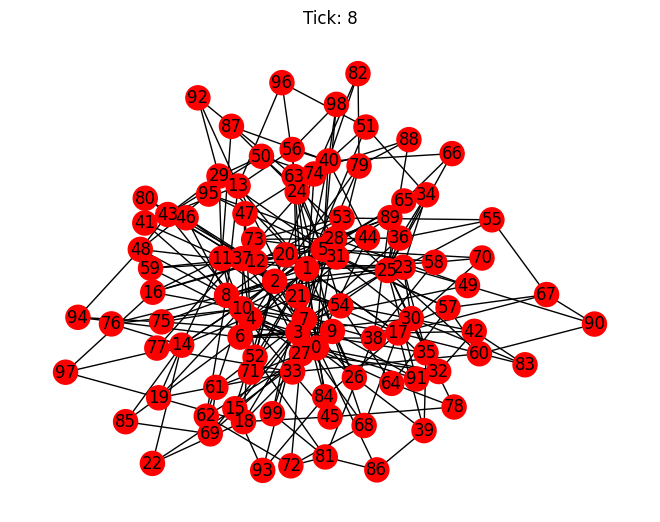

In [62]:
 network = generate_scale_free_network(100, m = 3)
 experiments_track_demo, corr_deg, corr_betw, corr_close = simulate_plot(network, 0.3, 15)


In [ ]:
   color_map = []
    for node in network:
        if node in infected_node:
            if node in first_infected_node:
                color_map.append('green')
            else:
                color_map.append('red')
        else: 
            color_map.append('blue')      
    nx.draw_networkx(network, with_labels=False, node_size=50, node_color=color_map)
    plt.title(f"State of the network: {model_names[i]} at tick 80")
    red_patch = patches.Patch(color='red', label='Infected')
    green_patch = patches.Patch(color='green', label='First Infected')
    blue_patch = patches.Patch(color='blue', label='Not Infected')
    plt.legend(handles=[red_patch, green_patch, blue_patch])
    plt.show()

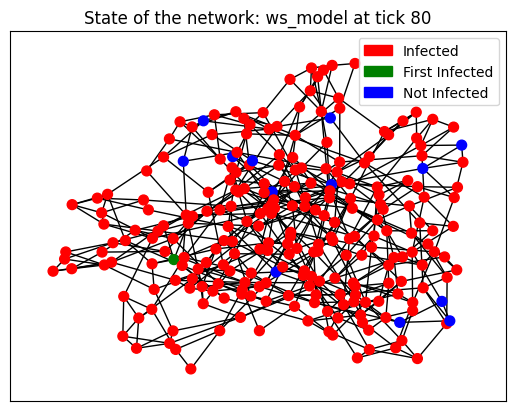

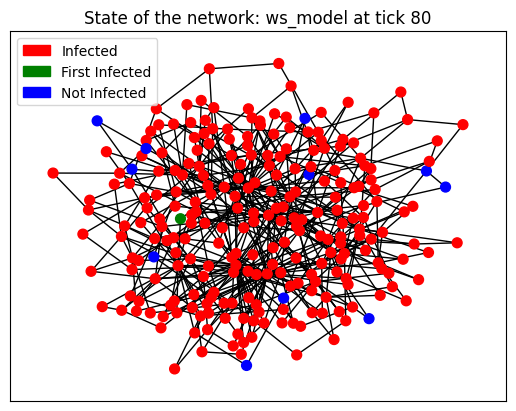

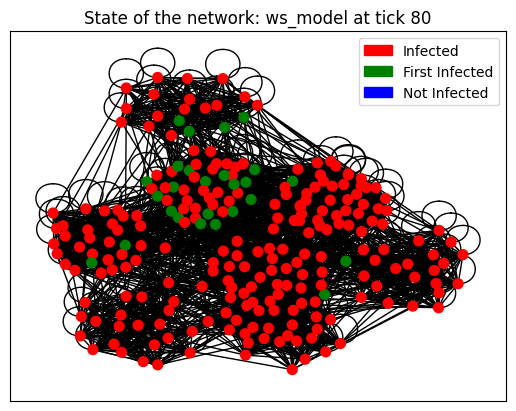

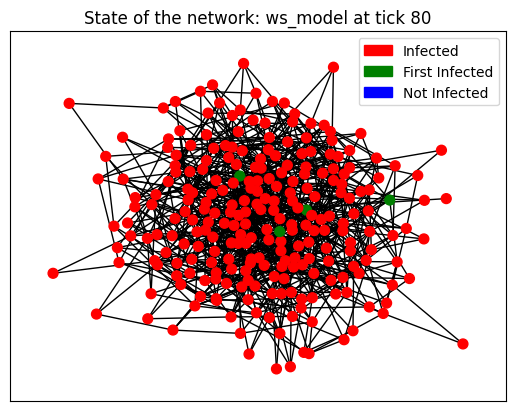

In [348]:
from matplotlib import patches

    network = generate_scale_free_network(N, m = 3)
    infected_node = experiments_track.loc[(3, str(model_names[i])),"infected_nodes"]
    first_infected_node = experiments_track.loc[(2, str(model_names[i])),"infected_nodes"]

    color_map = []
    for node in G:
        if node in infected_node:
            if node in first_infected_node:
                color_map.append('green')
            else:
                color_map.append('red')
        else: 
            color_map.append('blue')      
    nx.draw_networkx(network, with_labels=False, node_size=50, node_color=color_map)
    plt.title(f"State of the network: {model_names[i]} at tick 80")
    red_patch = patches.Patch(color='red', label='Infected')
    green_patch = patches.Patch(color='green', label='First Infected')
    blue_patch = patches.Patch(color='blue', label='Not Infected')
    plt.legend(handles=[red_patch, green_patch, blue_patch])
    plt.show()

Daria Stefan16:22
a.	Identifying the most vulnerable positions in each network
Measures:
•	Time until infection
•	Centrality (degree, betweenness, closeness)
b.	determining the resilience of each type of network in case of the event
Measures:
•	Number of infected nodes in a certain time
•	Time it takes for the whole network to be infected.
Daria Stefan16:43
for each network
for each node
calc 3 centralities and time to infection
Daria Stefan16:44
correlation coeff between the three centralities and time till infection